decision trees


In [6]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test  ,y_train , y_test = train_test_split(data.data , data.target)

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(x_train , y_train)
model.score(x_test , y_test)

0.9300699300699301

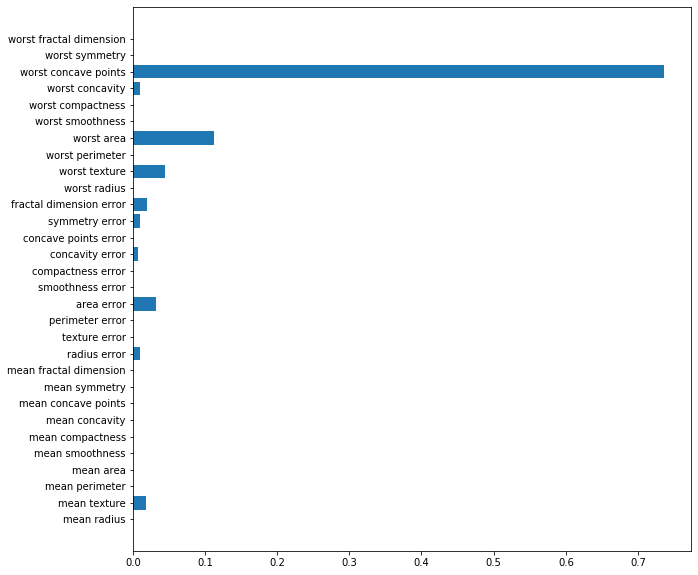

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.barh(data.feature_names , model.feature_importances_);

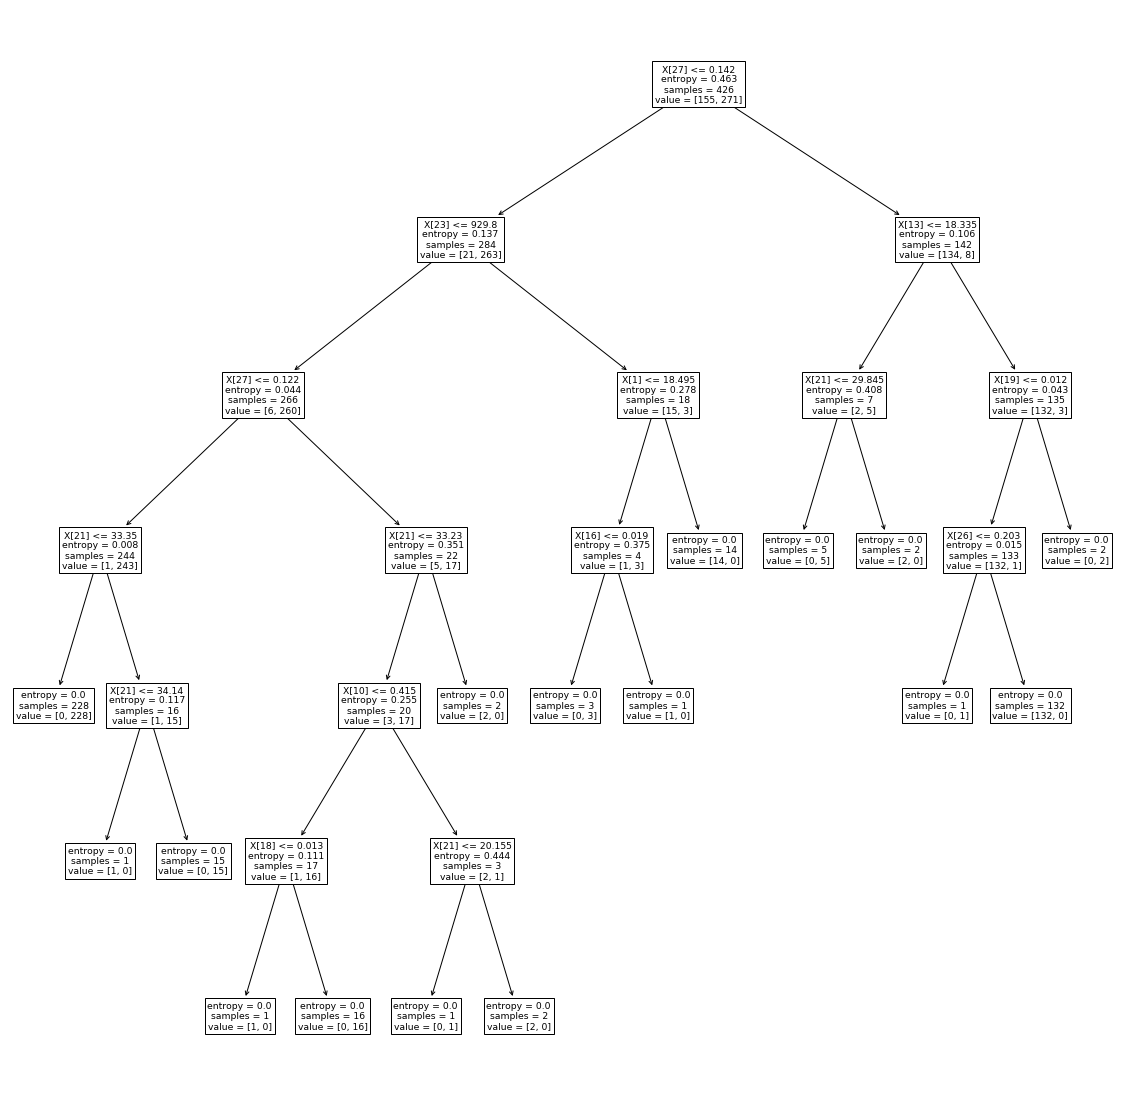

In [59]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize = (20 , 20))
plot_tree(model , ax = ax);

In [92]:
import numpy as np
feature1 = data.data[:,2].reshape(data.data[:,2].shape[0] , 1);
feature2 = data.data[:,6].reshape(data.data[:,6].shape[0] , 1);
x = np.append(feature1,feature2 , axis = 1)
y = data.target

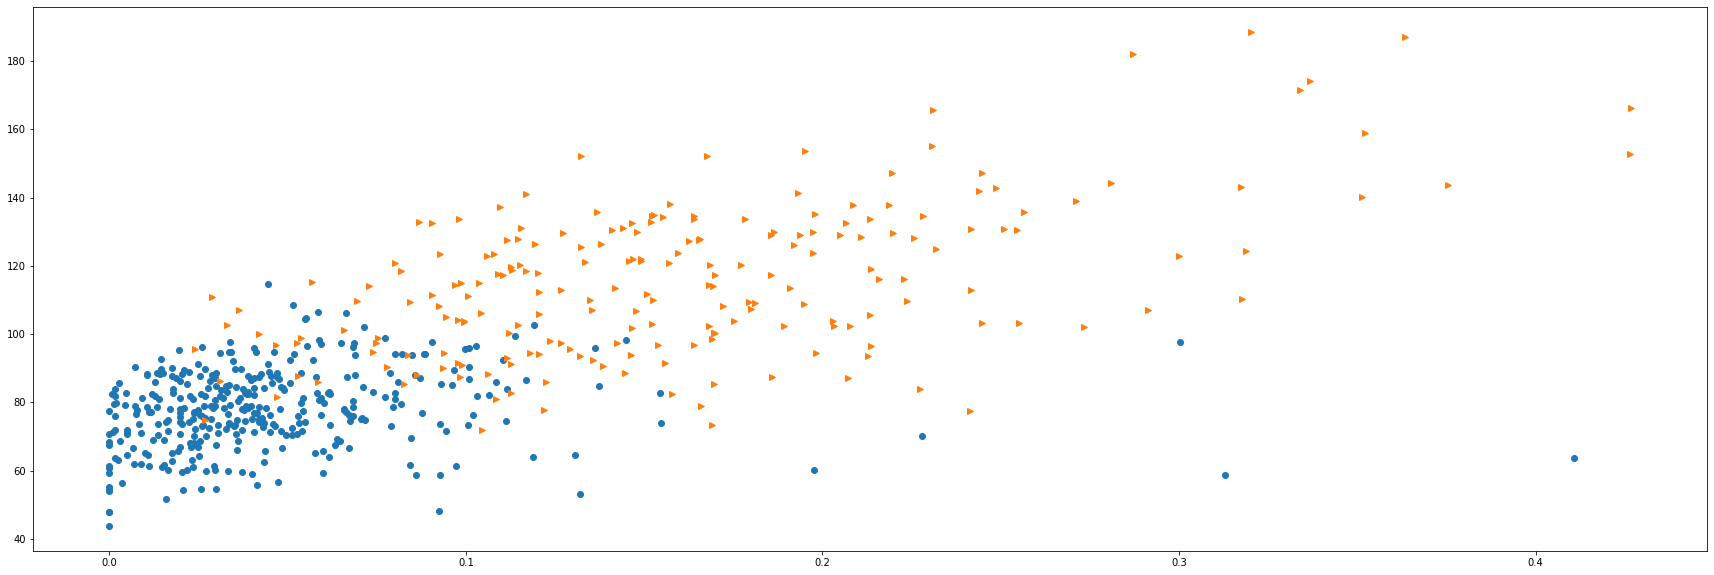

In [109]:
plt.figure(figsize=(30,10))
plt.plot(x[:,1][y==1] ,x[:,0][y==1] , 'o');
plt.plot(x[:,1][y==0] ,x[:,0][y==0] , '>');


In [124]:
def plot2_color(x ,y,c, classifier,parts=1000):
    eps = (min(max(x),max(y))-max(min(x),min(y)))/parts;
    x_lim = np.linspace(min(x)-eps,max(x)+eps,parts);
    y_lim = np.linspace(min(y)-eps,max(y)+eps,parts);
    x_vars , y_vars = np.meshgrid(x_lim , y_lim);
    mixed_up = np.c_[x_vars.ravel() , y_vars.ravel()];
    pred = classifier.predict(mixed_up);
    plt.figure(figsize=(30,10))
    ax = plt.gca();
    ax.imshow((pred.reshape(x_vars.shape)) , extent = [x.min()-eps,x.max()+eps , y.min()-eps,y.max()+eps],aspect='auto');
    ax.plot(x[c==0],y[c==0] ,'^')
    ax.plot(x[c==1],y[c==1] ,'^')
    plt.ylim(y_vars.min() , y_vars.max())
    plt.xlim(x_vars.min() , x_vars.max())

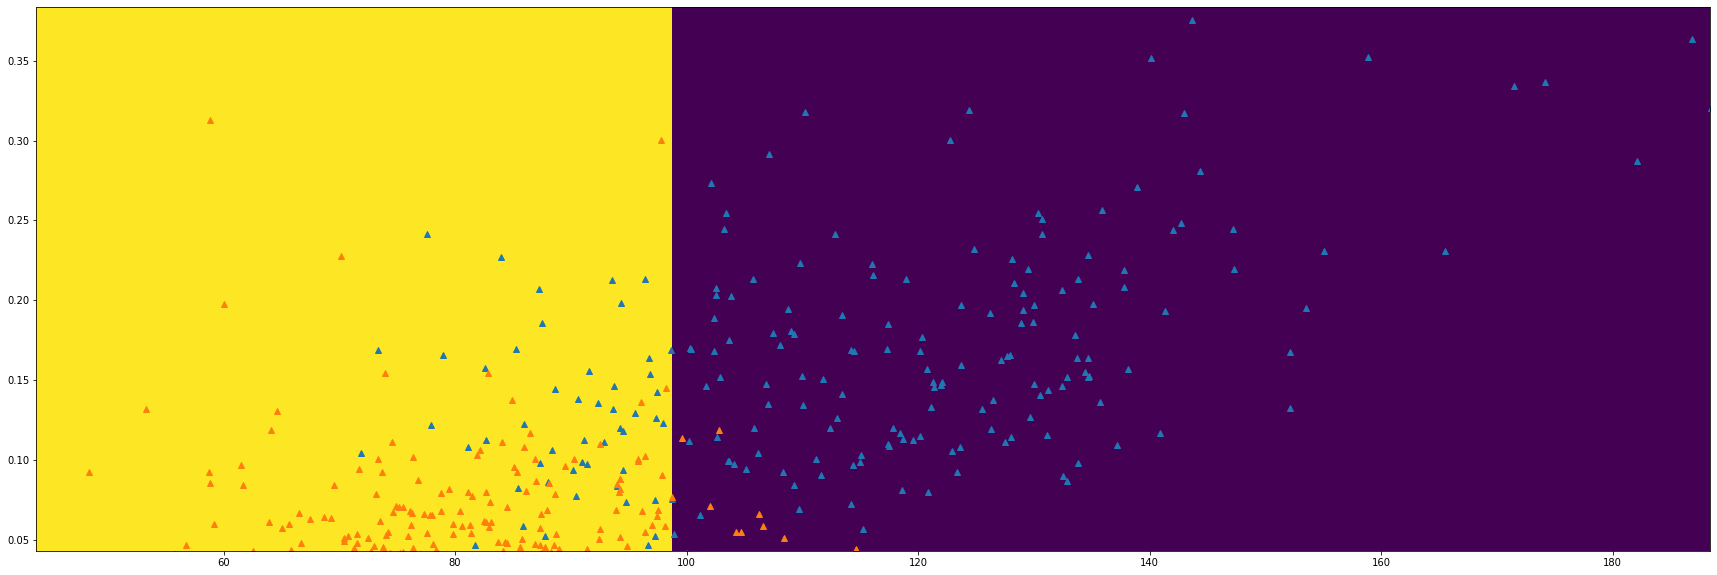

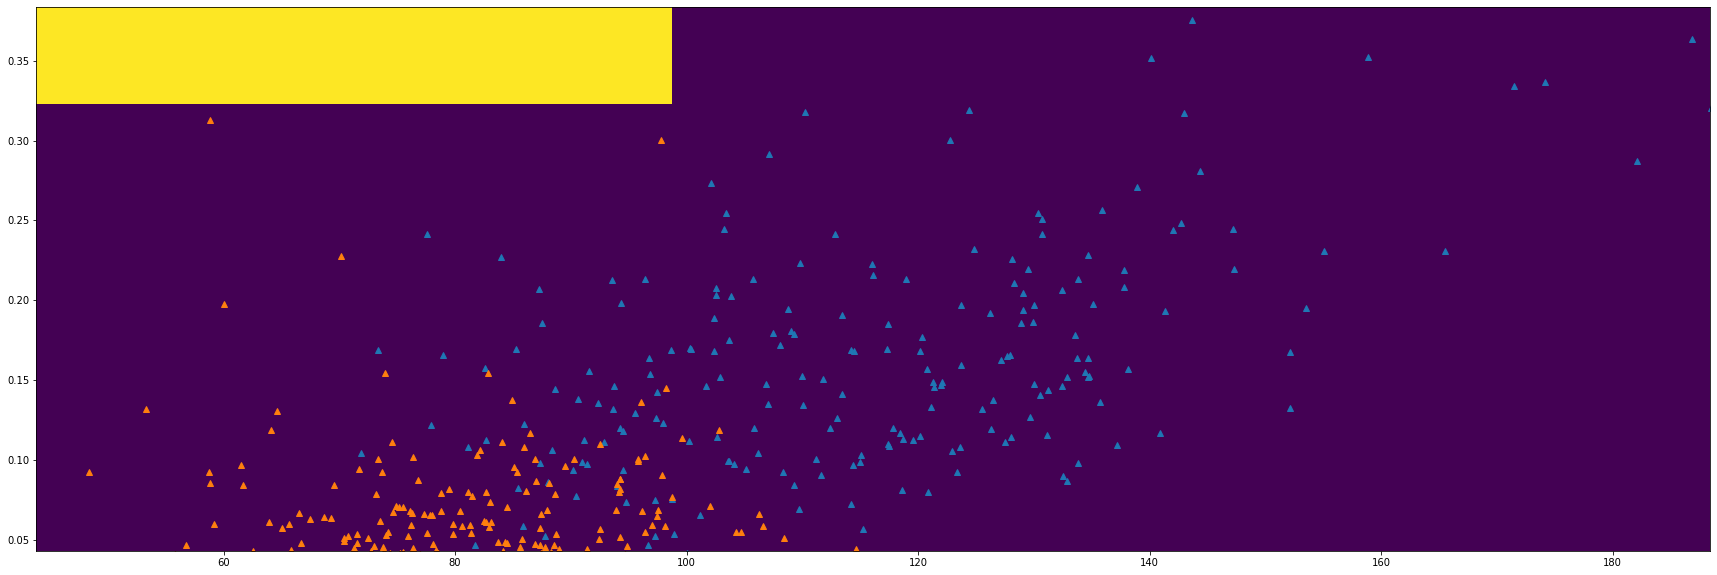

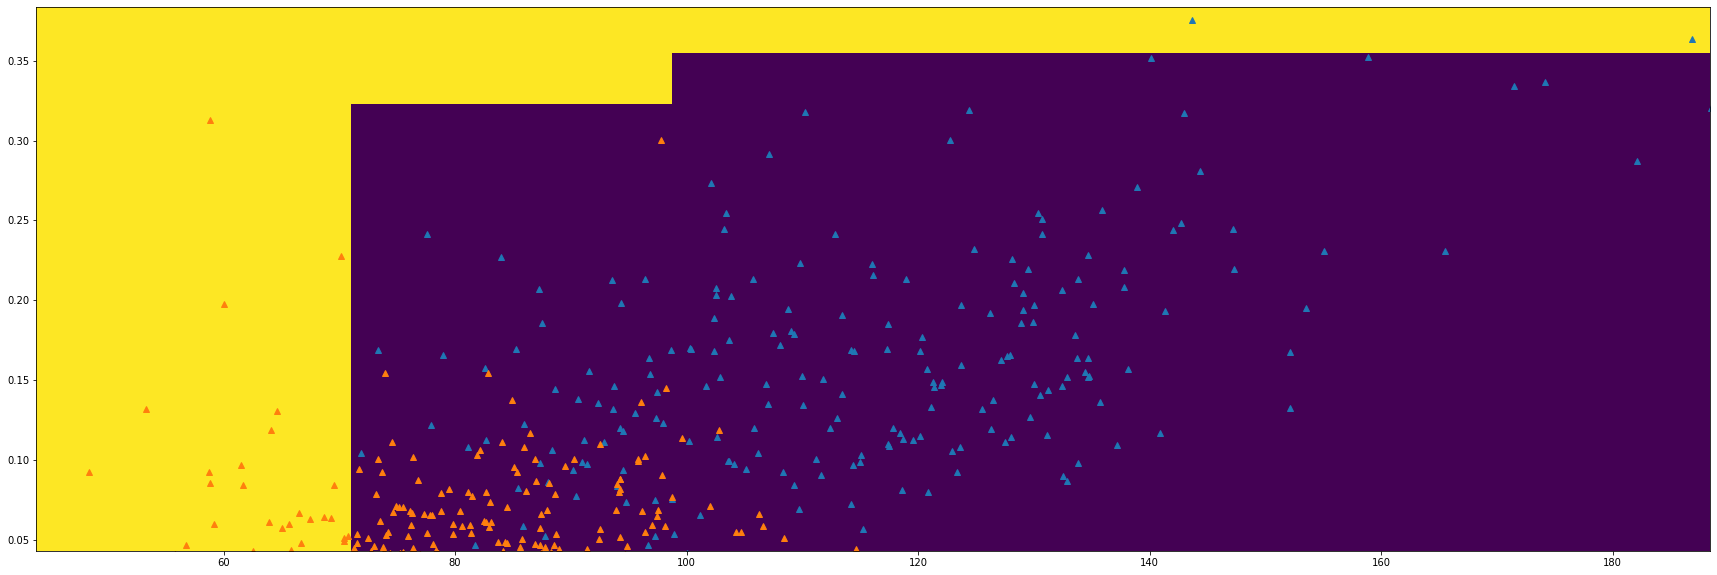

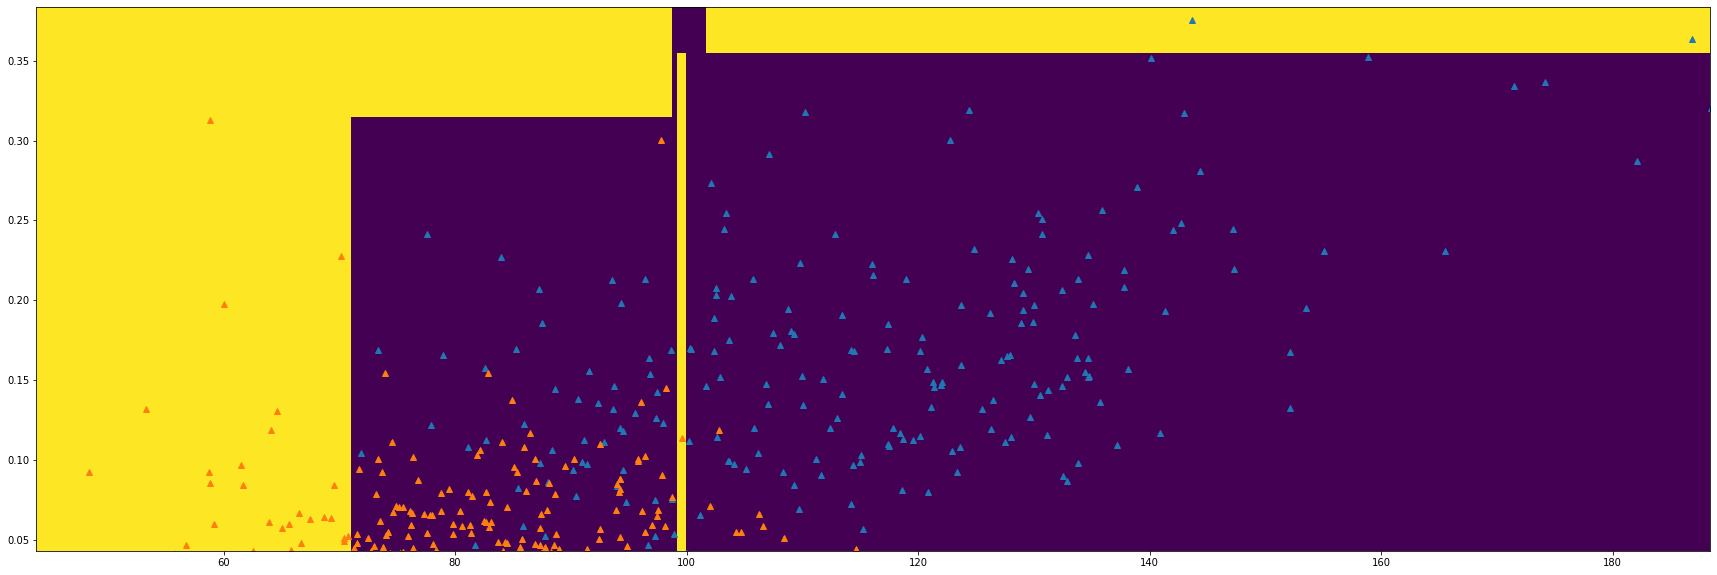

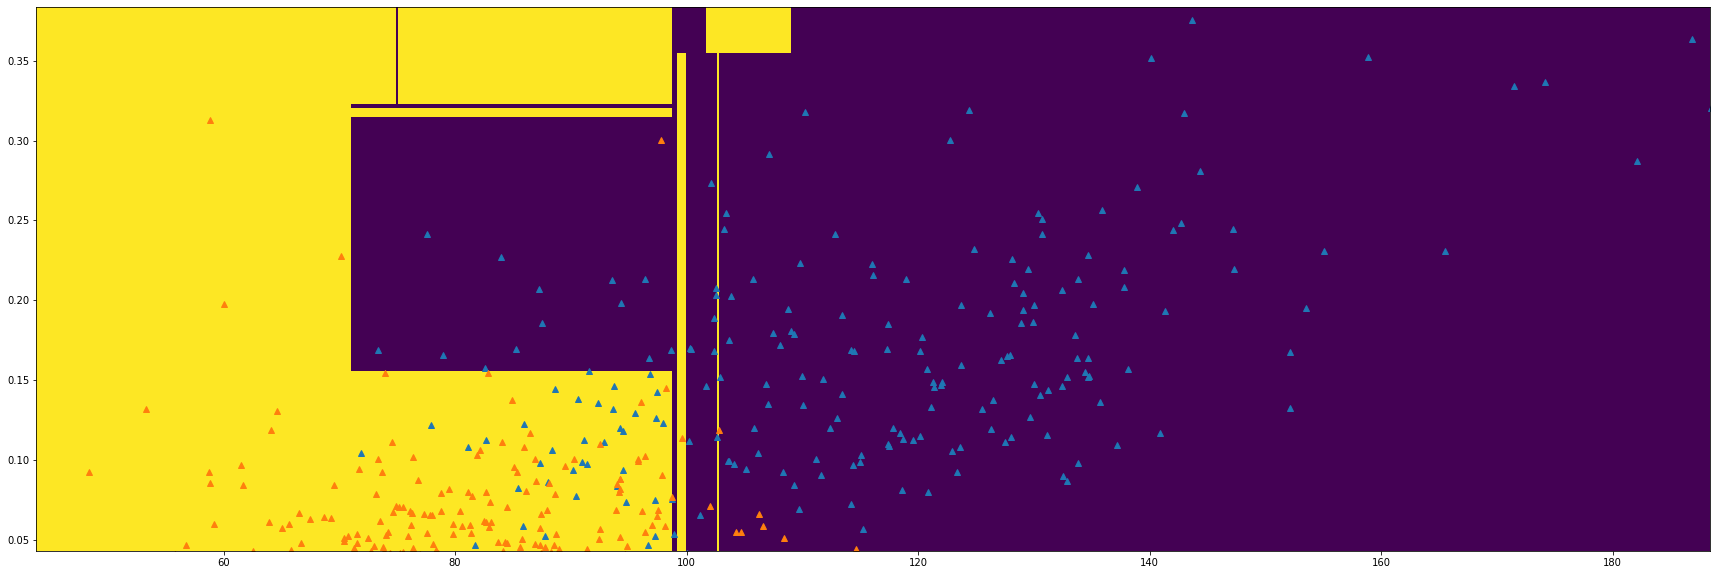

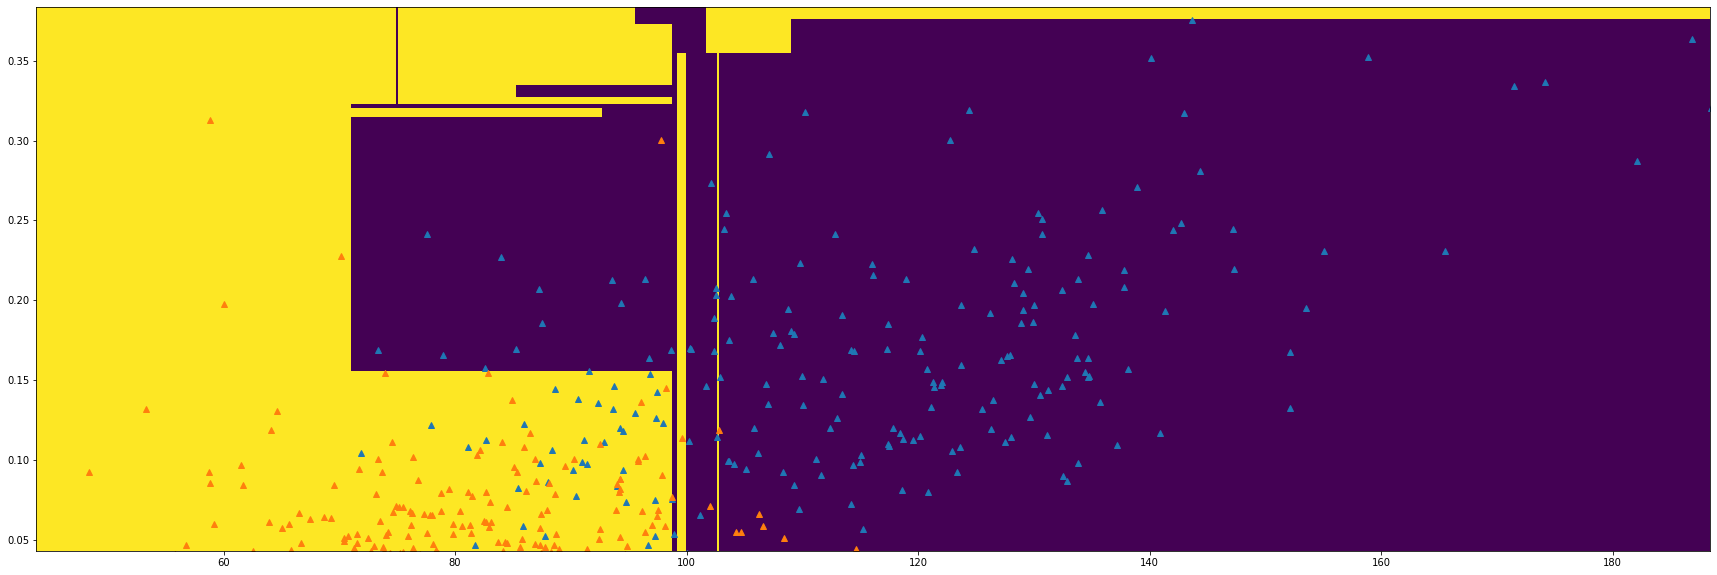

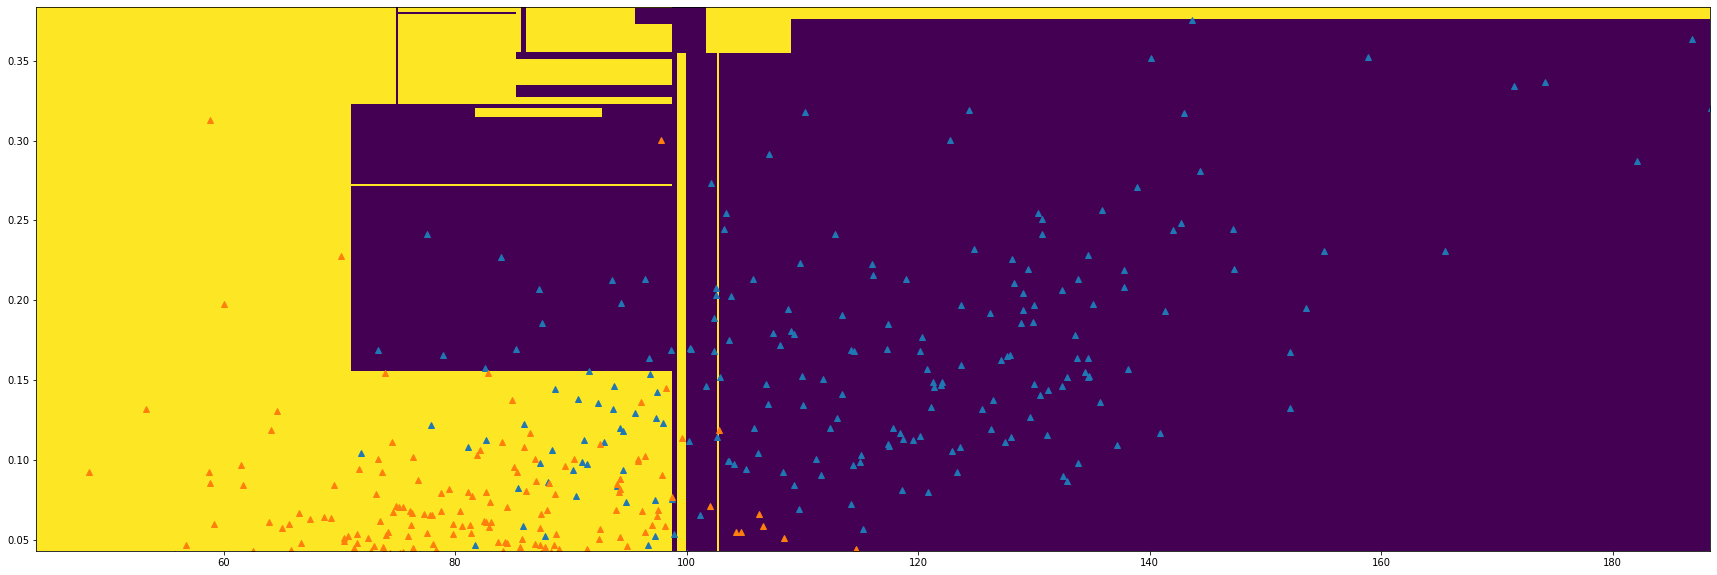

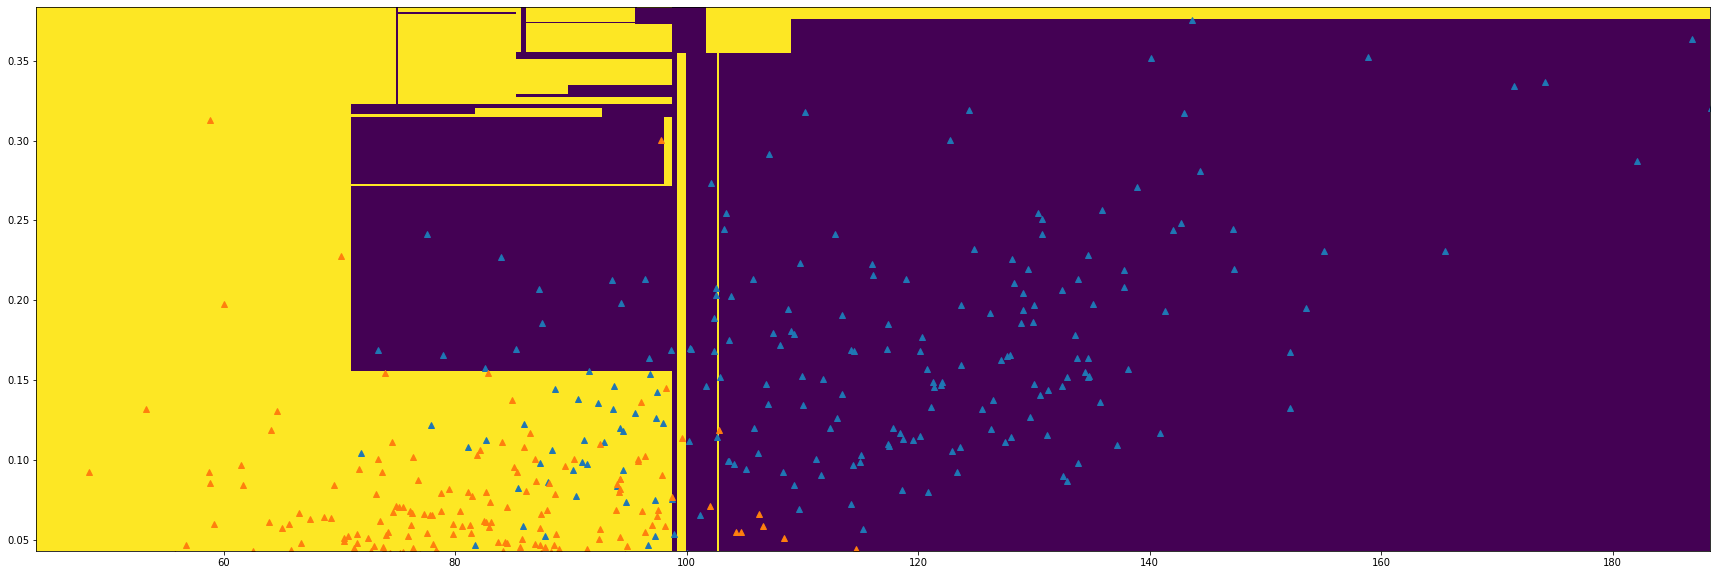

In [127]:
mx = [1,2,3,4,5,6,7,8]
for i in mx:
    model = DecisionTreeClassifier(max_depth = i).fit(x , y)
    plot2_color(x[:,0],x[:,1],y,model)

as you can see there is Overfit in this model type

--------------------------------------

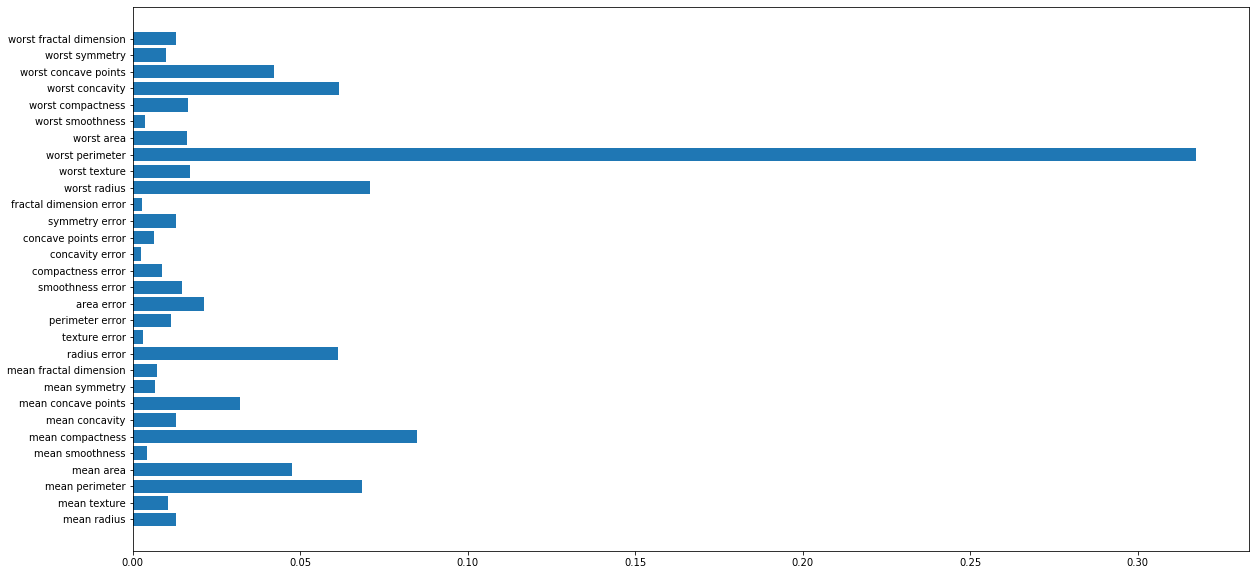

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
model = RandomForestClassifier(n_estimators = 10 , n_jobs=-1 , max_features = 2 , max_depth = 10).fit(data.data, data.target)
plt.figure(figsize = (20 , 10))
plt.barh(data.feature_names , model.feature_importances_);

In [148]:
model.score(data.data , data.target)

0.9982425307557118

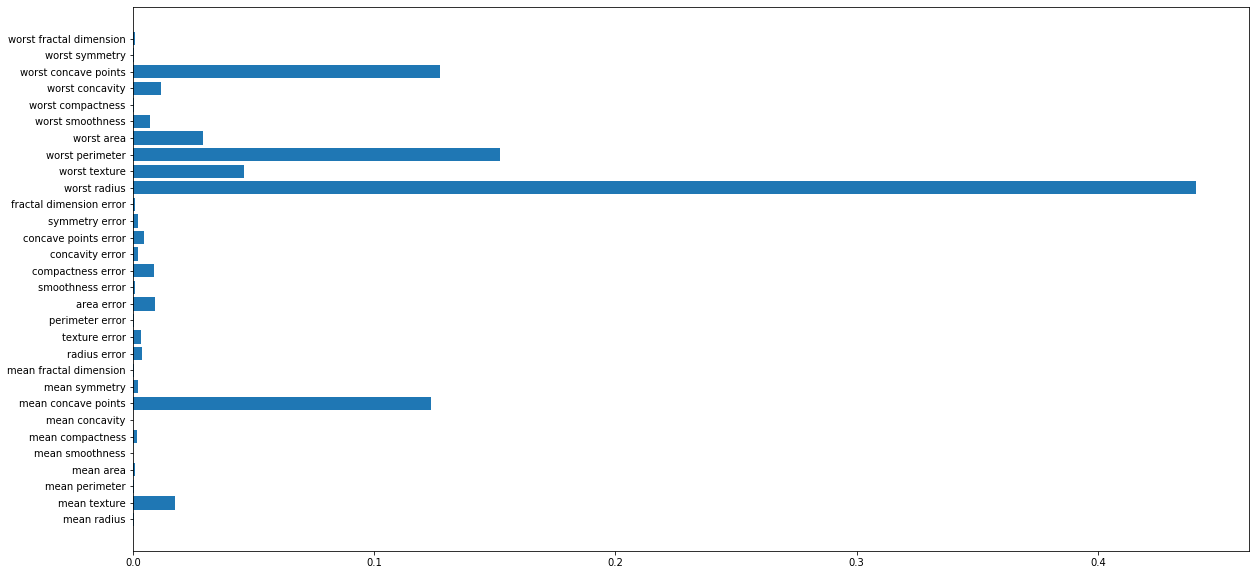

In [152]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier().fit(data.data , data.target)
plt.figure(figsize = (20,10))
plt.barh(data.feature_names , model.feature_importances_);

In [153]:
model.score(data.data ,data.target)

1.0

in Boosting Classifier :
* combines a lot of "weak learner" as stumps
* some stumps get more say in the classification than others
* each stumps is made by taking the previous stump`s mistakes into account


so it has more accuracy and is faster to train and less depth.

 Good Luck